In [1]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
import xarray as xr
import os, glob
import Nio
from scipy.io import loadmat
import pandas as pd 
import datetime

/Users/nicolasdeassisbose/anaconda3/lib/python3.6/site-packages/dask/config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
# Open Hs WW3 data

%cd /Users/nicolasdeassisbose/Desktop/codigo_artigo/ww3_parameters

path_hs = sorted(glob.glob(os.path.join('multi_1.glo_30m.hs*.grb2')))

pr1_hs = xr.open_dataset(path_hs[0], engine = 'pynio')
pr2_hs = xr.open_dataset(path_hs[1], engine = 'pynio')
#pr3_hs = xr.open_dataset(path_hs[2], engine = 'pynio')
#pr4_hs = xr.open_dataset(path_hs[3], engine = 'pynio')
#pr5_hs = xr.open_dataset(path_hs[4], engine = 'pynio')
#pr6_hs = xr.open_dataset(path_hs[5], engine = 'pynio')
#pr7_hs = xr.open_dataset(path_hs[6], engine = 'pynio')
#pr8_hs = xr.open_dataset(path_hs[7], engine = 'pynio')
#pr9_hs = xr.open_dataset(path_hs[8], engine = 'pynio')
#pr10_hs = xr.open_dataset(path_hs[9], engine = 'pynio')
#pr11_hs = xr.open_dataset(path_hs[10], engine = 'pynio')
#pr12_hs = xr.open_dataset(path_hs[11], engine = 'pynio')

/Users/nicolasdeassisbose/Desktop/codigo_artigo/ww3_parameters


In [4]:
# Open Tp WW3 data

path_tp = sorted(glob.glob(os.path.join('multi_1.glo_30m.tp*.grb2')))

pr1_tp = xr.open_dataset(path_tp[0], engine = 'pynio')
pr2_tp = xr.open_dataset(path_tp[1], engine = 'pynio')
#pr3_tp = xr.open_dataset(path_tp[2], engine = 'pynio')
#pr4_tp = xr.open_dataset(path_tp[3], engine = 'pynio')
#pr5_tp = xr.open_dataset(path_tp[4], engine = 'pynio')
#pr6_tp = xr.open_dataset(path_tp[5], engine = 'pynio')
#pr7_tp = xr.open_dataset(path_tp[6], engine = 'pynio')
#pr8_tp = xr.open_dataset(path_tp[7], engine = 'pynio')
#pr9_tp = xr.open_dataset(path_tp[8], engine = 'pynio')
#pr10_tp = xr.open_dataset(path_tp[9], engine = 'pynio')
#pr11_tp = xr.open_dataset(path_tp[10], engine = 'pynio')
#pr12_tp = xr.open_dataset(path_tp[11], engine = 'pynio')

In [5]:
# Open Dp WW3 data

path_dp = sorted(glob.glob(os.path.join('multi_1.glo_30m.dp*.grb2')))

pr1_dp = xr.open_dataset(path_dp[0], engine = 'pynio')
pr2_dp = xr.open_dataset(path_dp[1], engine = 'pynio')
#pr3_dp = xr.open_dataset(path_dp[2], engine = 'pynio')
#pr4_dp = xr.open_dataset(path_dp[3], engine = 'pynio')
#pr5_dp = xr.open_dataset(path_dp[4], engine = 'pynio')
#pr6_dp = xr.open_dataset(path_dp[5], engine = 'pynio')
#pr7_dp = xr.open_dataset(path_dp[6], engine = 'pynio')
#pr8_dp = xr.open_dataset(path_dp[7], engine = 'pynio')
#pr9_dp = xr.open_dataset(path_dp[8], engine = 'pynio')
#pr10_dp = xr.open_dataset(path_dp[9], engine = 'pynio')
#pr11_dp = xr.open_dataset(path_dp[10], engine = 'pynio')
#pr12_dp = xr.open_dataset(path_dp[11], engine = 'pynio')

In [7]:
# Coordinate WW3 


lat_ww3 = pr1_hs['lat_0'].values
lon_ww3 = pr1_hs['lon_0'].values-360
    

In [8]:
# Time from WW3/NCEP

time_0 = '20150101' 
time_end = '20150228 21:00:00'
time = pd.date_range(time_0, time_end, freq='3H')
time_forecast = time.format(formatter=lambda x: x.strftime('%Y%m%d.%H%M'))

In [9]:
## Load SWAN Grid

x = loadmat('grid_controle.mat')
lat_swan = x['Yp']
lon_swan = x['Xp']

29


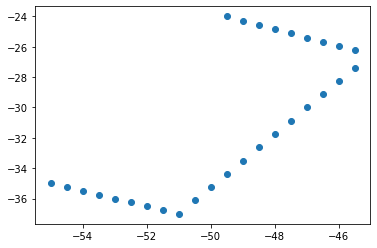

In [10]:
## Function to write the boundary

def coord_points(vert1, vert2, resolution):
    import numpy as np
    
    # Create matrix of linear equation ax + b = y from vertices
    a = np.array([[vert1[0], 1], [vert2[0], 1]])
    b = np.array([vert1[1], vert2[1]])
    
    #Calculate a and b
    a, b = np.linalg.solve(a, b)
    
    # Create list of x coords between vertices
    x_coords = np.arange(vert1[0], vert2[0], resolution).tolist()
    y_coords = []
    
    # Calculate y coords from x coords
    for coord in x_coords:
        y = (a*coord) + b
        y_coords.append(y)
    coords = np.column_stack((x_coords, y_coords))
    return coords


## Grid Coordinate edges

vert_NE = [-45.0, -26.5]
vert_NW = [-49.5, -24.0]
vert_SE = [-51.0, -37.0]
vert_SW = [-55.0, -35.0]

coords_north = coord_points(vert_NW, vert_NE, 0.5)
coords_east = coord_points(vert_SE, vert_NE, 0.5).tolist()
coords_east.sort(reverse = True)
coords_east = np.array(coords_east)
coords_south = coord_points(vert_SW,vert_SE, 0.5).tolist()
coords_south.sort(reverse = True)
coords_south = np.array(coords_south)

coords = np.vstack((coords_north, coords_east, coords_south))

print(len(coords))

plt.scatter(coords[:,[0]],coords[:,[1]])
plt.show()

In [11]:
## Extract Hs boundary points

hs_pr1 = []
hs_pr2 = []
hs_pr3 = []
hs_pr4 = []
hs_pr5 = []
hs_pr6 = []
hs_pr7 = []
hs_pr8 = []
hs_pr9 = []
hs_pr10 = []
hs_pr11 = []
hs_pr12 = []

for p in range(len(coords)):
    hs_pr01 = pr1_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    hs_pr02 = pr2_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr03 = pr3_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr04 = pr4_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr05 = pr5_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr06 = pr6_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr07 = pr7_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr08 = pr8_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr09 = pr9_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr10 = pr10_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr11 = pr11_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #hs_pr12 = pr12_hs.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    hs_pr1.append(hs_pr01)
    hs_pr2.append(hs_pr02)
    #hs_pr3.append(hs_pr03)
    #hs_pr4.append(hs_pr04)
    #hs_pr5.append(hs_pr05)
    #hs_pr6.append(hs_pr06)
    #hs_pr7.append(hs_pr07)
    #hs_pr8.append(hs_pr08)
    #hs_pr9.append(hs_pr09)
    #hs_pr10.append(hs_pr10)
    #hs_pr11.append(hs_pr11)
    #hs_pr12.append(hs_pr12)
    
Hs1 = np.array(list(xr.concat(hs_pr1,"new_dim").HTSGW_P0_L1_GLL0.values))
Hs2 = np.array(list(xr.concat(hs_pr2,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs3 = np.array(list(xr.concat(hs_pr3,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs4 = np.array(list(xr.concat(hs_pr4,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs5 = np.array(list(xr.concat(hs_pr5,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs6 = np.array(list(xr.concat(hs_pr6,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs7 = np.array(list(xr.concat(hs_pr7,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs8 = np.array(list(xr.concat(hs_pr8,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs9 = np.array(list(xr.concat(hs_pr9,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs10 = np.array(list(xr.concat(hs_pr10,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs11 = np.array(list(xr.concat(hs_pr11,"new_dim").HTSGW_P0_L1_GLL0.values))
#Hs12 = np.array(list(xr.concat(hs_pr12,"new_dim").HTSGW_P0_L1_GLL0.values))



In [12]:
hs_hind = np.concatenate([Hs1[:,:-1],Hs2[:,:-1]],1)

In [15]:
## Extract tp boundary points

tp_pr1 = []
tp_pr2 = []
tp_pr3 = []
tp_pr4 = []
tp_pr5 = []
tp_pr6 = []
tp_pr7 = []
tp_pr8 = []
tp_pr9 = []
tp_pr10 = []
tp_pr11 = []
tp_pr12 = []

for p in range(len(coords)):
    tp_pr01 = pr1_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    tp_pr02 = pr2_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr03 = pr3_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr04 = pr4_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr05 = pr5_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr06 = pr6_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr07 = pr7_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr08 = pr8_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr09 = pr9_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr10 = pr10_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr11 = pr11_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #tp_pr12 = pr12_tp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    tp_pr1.append(tp_pr01)
    tp_pr2.append(tp_pr02)
    #tp_pr3.append(tp_pr03)
    #tp_pr4.append(tp_pr04)
    #tp_pr5.append(tp_pr05)
    #tp_pr6.append(tp_pr06)
    #tp_pr7.append(tp_pr07)
    #tp_pr8.append(tp_pr08)
    #tp_pr9.append(tp_pr09)
    #tp_pr10.append(tp_pr10)
    #tp_pr11.append(tp_pr11)
    #tp_pr12.append(tp_pr12)
    
tp1 = np.array(list(xr.concat(tp_pr1,"new_dim").PERPW_P0_L1_GLL0.values))
tp2 = np.array(list(xr.concat(tp_pr2,"new_dim").PERPW_P0_L1_GLL0.values))
#tp3 = np.array(list(xr.concat(tp_pr3,"new_dim").PERPW_P0_L1_GLL0.values))
#tp4 = np.array(list(xr.concat(tp_pr4,"new_dim").PERPW_P0_L1_GLL0.values))
#tp5 = np.array(list(xr.concat(tp_pr5,"new_dim").PERPW_P0_L1_GLL0.values))
#tp6 = np.array(list(xr.concat(tp_pr6,"new_dim").PERPW_P0_L1_GLL0.values))
#tp7 = np.array(list(xr.concat(tp_pr7,"new_dim").PERPW_P0_L1_GLL0.values))
#tp8 = np.array(list(xr.concat(tp_pr8,"new_dim").PERPW_P0_L1_GLL0.values))
#tp9 = np.array(list(xr.concat(tp_pr9,"new_dim").PERPW_P0_L1_GLL0.values))
#tp10 = np.array(list(xr.concat(tp_pr10,"new_dim").PERPW_P0_L1_GLL0.values))
#tp11 = np.array(list(xr.concat(tp_pr11,"new_dim").PERPW_P0_L1_GLL0.values))
#tp12 = np.array(list(xr.concat(tp_pr12,"new_dim").PERPW_P0_L1_GLL0.values))

In [16]:
tp_hind = np.concatenate([tp1[:,:-1],tp2[:,:-1]],1)

In [19]:
## Extract Dp boundary points

dp_pr1 = []
dp_pr2 = []
dp_pr3 = []
dp_pr4 = []
dp_pr5 = []
dp_pr6 = []
dp_pr7 = []
dp_pr8 = []
dp_pr9 = []
dp_pr10 = []
dp_pr11 = []
dp_pr12 = []

for p in range(len(coords)):
    dp_pr01 = pr1_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    dp_pr02 = pr2_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr03 = pr3_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr04 = pr4_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr05 = pr5_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr06 = pr6_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr07 = pr7_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr08 = pr8_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr09 = pr9_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr10 = pr10_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr11 = pr11_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    #dp_pr12 = pr12_dp.sel(dict(lon_0=(coords[p][0]+360),lat_0=coords[p][1]),method='nearest')
    dp_pr1.append(dp_pr01)
    dp_pr2.append(dp_pr02)
    #dp_pr3.append(dp_pr03)
    #dp_pr4.append(dp_pr04)
    #dp_pr5.append(dp_pr05)
    #dp_pr6.append(dp_pr06)
    #dp_pr7.append(dp_pr07)
    #dp_pr8.append(dp_pr08)
    #dp_pr9.append(dp_pr09)
    #dp_pr10.append(dp_pr10)
    #dp_pr11.append(dp_pr11)
    #dp_pr12.append(dp_pr12)
    
dp1 = np.array(list(xr.concat(dp_pr1,"new_dim").DIRPW_P0_L1_GLL0.values))
dp2 = np.array(list(xr.concat(dp_pr2,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp3 = np.array(list(xr.concat(dp_pr3,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp4 = np.array(list(xr.concat(dp_pr4,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp5 = np.array(list(xr.concat(dp_pr5,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp6 = np.array(list(xr.concat(dp_pr6,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp7 = np.array(list(xr.concat(dp_pr7,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp8 = np.array(list(xr.concat(dp_pr8,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp9 = np.array(list(xr.concat(dp_pr9,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp10 = np.array(list(xr.concat(dp_pr10,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp11 = np.array(list(xr.concat(dp_pr11,"new_dim").DIRPW_P0_L1_GLL0.values))
#dp12 = np.array(list(xr.concat(dp_pr12,"new_dim").DIRPW_P0_L1_GLL0.values))

In [20]:
dp_hind = np.concatenate([dp1[:,:-1],dp2[:,:-1]],1)

In [21]:
## Colum of Directional Spread 

spr = np.ones([len(time_forecast),1])*4 # 4 is used as Directional Spread as suggested in swan manual


In [27]:
## WRITE TPAR wave boundary condition

for i in range(2):
    f = open("tpar_forecast" + str(i) + ".bnd", "w")
    f.write("TPAR")
    f.write('''
''')
    TPAR = np.transpose(np.vstack((time_forecast,hs_hind[i][:],tp_hind[i][:],dp_hind[i][:],spr[:,0])))
    f.write(pd.DataFrame(TPAR).to_string(index=False,
                                                   header=False,
                                                   float_format='%10.5f'))
    f = open("tpar_forecast" + str(i) + ".bnd","rt")
    data = f.read()
    data = data.replace(" 2015", "2015")
    
    
    f = open("tpar_forecast" + str(i) + ".bnd","wt")
    f.write(data)
    f.close()
    
    f.close()

In [25]:
hs_hind.shape

(2, 472)

TypeError: list indices must be integers or slices, not tuple

In [108]:
waves01[:,].shape

(2, 249)